In [1]:
#Assignment1 for EDA on Haberman DataSet
# Reading the Haberman's Data Set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

#Load Haberman.csv into a pandas dataFrame.
habermanComplete = pd.read_csv("/Users/dpraharaj/DriveD/MLAI/Assignment/M2-EDA/haberman.csv")

In [2]:
#Getting the shape , column names & counts of the dataset
print (habermanComplete.shape)
print (habermanComplete.columns)
habermanComplete["status"].value_counts()

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

In [3]:
#Dropping out the Surv_status column from the data set
#print (habermanComplete.iloc[:, 0:3])
haberman=habermanComplete.iloc[:, 0:3]
print (haberman)

     age  year  nodes
0     30    64      1
1     30    62      3
2     30    65      0
3     31    59      2
4     31    65      4
..   ...   ...    ...
301   75    62      1
302   76    67      0
303   77    65      3
304   78    65      1
305   83    58      2

[306 rows x 3 columns]


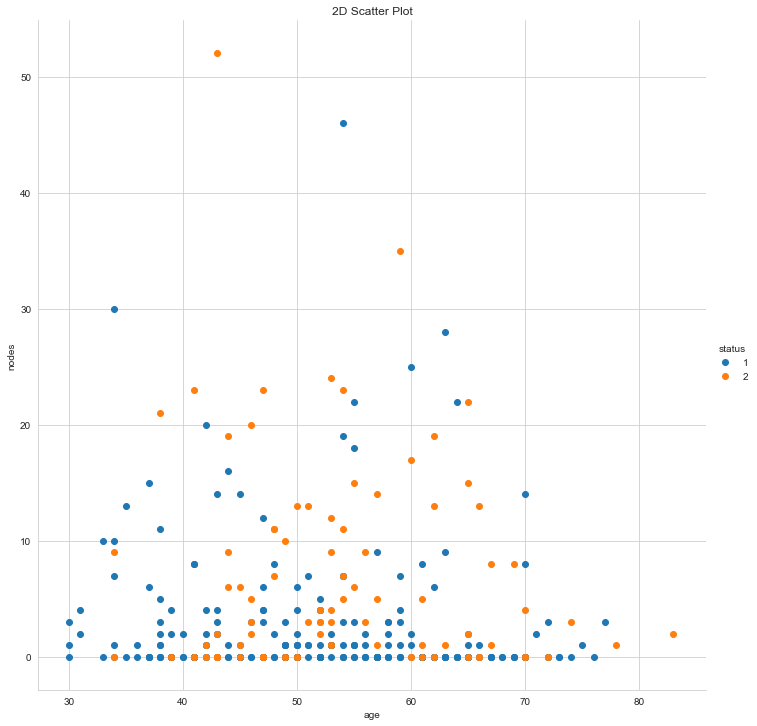

In [4]:
#2D Scatter Plot for habermanComplete data set.
sns.set_style("whitegrid");
sns.FacetGrid(habermanComplete, hue="status", size=10) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2D Scatter Plot")
plt.show();

#Observation from the above Plot
#From the 2D Scatter plot it's not clear to identify the status conclusion  from both the features "nodes" and "age"
#But mostly majority of nodes are <10 and there are negligible counts where node>30
#Also if we check from age point of view all the surv_status lies between 30-80

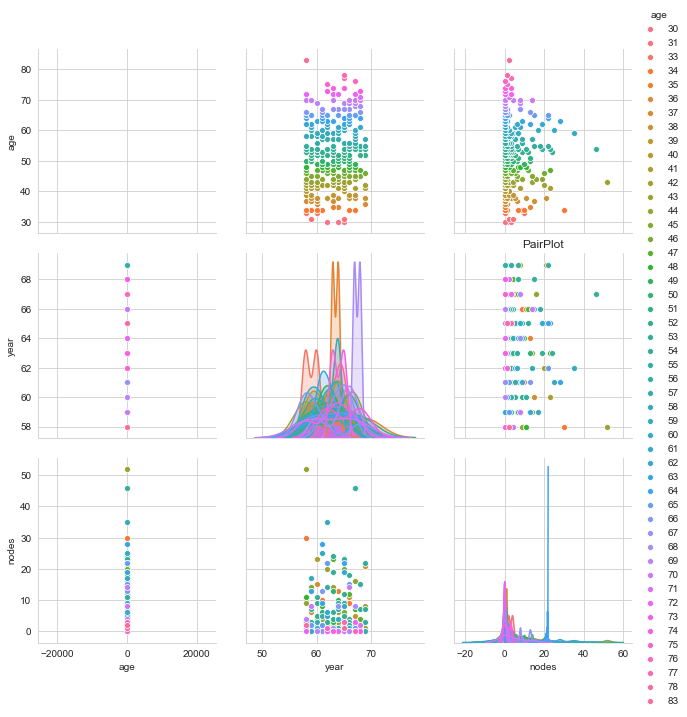

In [5]:
#2D Pair Plot by considering the 3 features(age,nodes,Year of operration)
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="age", size=3);
plt.show()

#Observation from the above Plot
#From the above pair plot none of the graph is determintal to decide the status code conclusion based on the pair of features.
#Mostly from Age & year plot, all the points lies where (30<age<80) and yearof Operation is (56<Year<70)


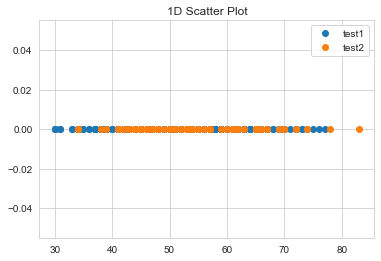

In [36]:
#Histogram, PDF, CDF
# What about 1-D scatter plot using just one feature?
#1-D scatter plot 
import numpy as np
surv_status1 = habermanComplete.loc[habermanComplete["status"] == 1];
#print(surv_status1)
surv_status2 = habermanComplete.loc[habermanComplete["status"] == 2];
#print(surv_status2)
plt.plot(surv_status1["age"], np.zeros_like(surv_status1['age']), 'o',label="surv_status1")
plt.plot(surv_status2["age"], np.zeros_like(surv_status2['age']), 'o',label="surv_status2")
plt.title("1D Scatter Plot")
plt.legend()
plt.show()

#Observation from the above Plot
#from  the above 1D scatter plot  it's so clumsy to decide the conclussion. Mostly it's overllaping straight line.

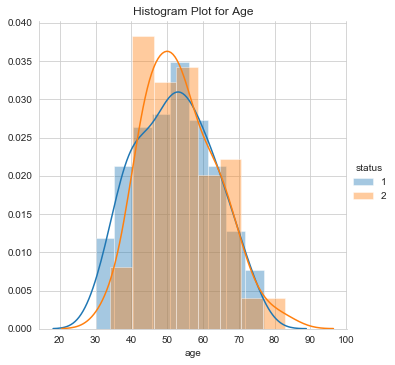

In [8]:
# Histograms w.r.t age
sns.FacetGrid(habermanComplete, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram Plot for Age")
plt.show();

#Observation from the above Plot
#Both the histogram are overlapping with each other. so distinguish relation can not be derived from it.
#But mostly if we check then we are getting the conclusion like
#if age >40 and age<70 where major of the patient get the status code of 1 and 2. But the the density for status=2 is
#is little higher than status=1 as per the PDF



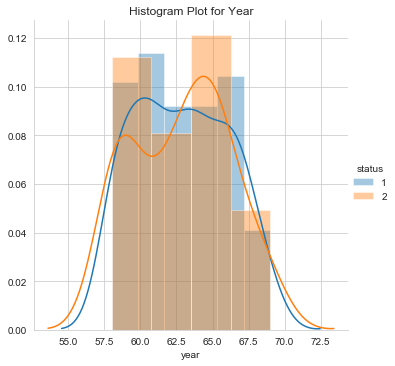

In [9]:
# Histograms w.r.t Year of Operation
sns.FacetGrid(habermanComplete, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram Plot for Year")
plt.show();

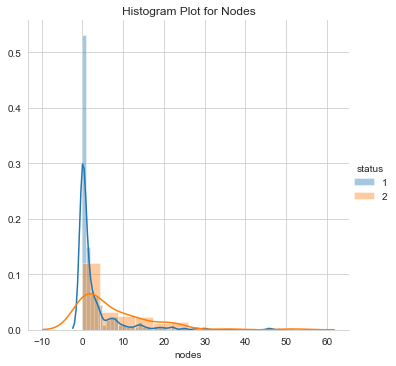

In [10]:
# Histograms w.r.t Nodes 
sns.FacetGrid(habermanComplete, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram Plot for Nodes")
plt.show();

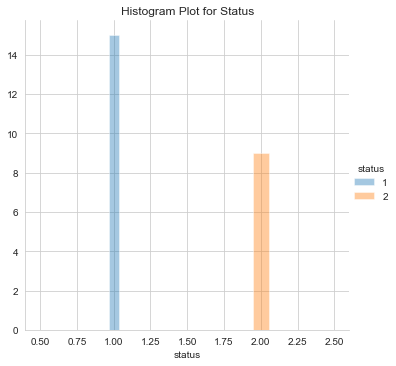

In [11]:
# Histograms w.r.t Status
sns.FacetGrid(habermanComplete, hue="status", size=5) \
   .map(sns.distplot, "status") \
   .add_legend();
plt.title("Histogram Plot for Status")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


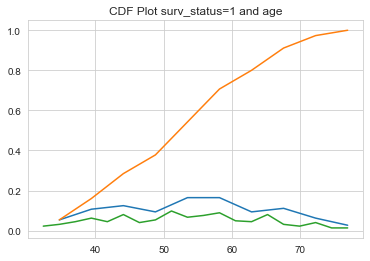

In [12]:
#Plot CDF of age with Respect to surv_status=1 and "age"

counts, bin_edges = np.histogram(surv_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(surv_status1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("CDF Plot surv_status=1 and age")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


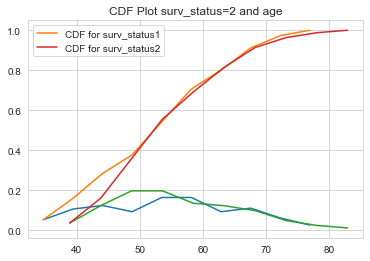

In [37]:
# Plots of CDF of surv_status1=1 and "age"


counts, bin_edges = np.histogram(surv_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label="CDF for surv_status1")


# CDF for surv_status2=2 and age
counts, bin_edges = np.histogram(surv_status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label="CDF for surv_status2")


plt.title("CDF Plot surv_status=2 and age")
plt.legend()
plt.show();

#Observation from the above Plot
#Both the PDF and CDF are overlapping with each other. so distinguish relation can not be derived from it.




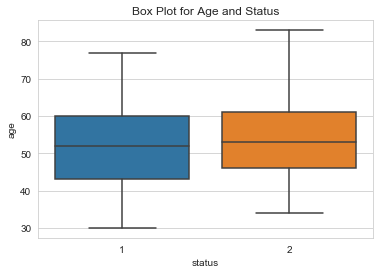

In [14]:
#Box Plot for HaberMan Data Set w.r.t. Status and Age column
sns.boxplot(x='status',y='age', data=habermanComplete)
plt.title("Box Plot for Age and Status")
plt.show()

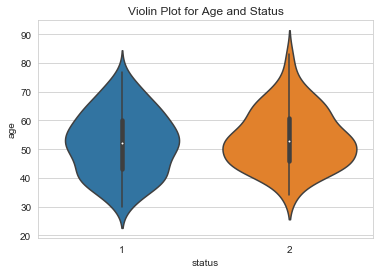

In [15]:
#Violin Plot for HaberMan Data Set w.r.t. Status and Age column
sns.violinplot(x="status", y="age", data=habermanComplete, size=8)
plt.title("Violin Plot for Age and Status")
plt.show()

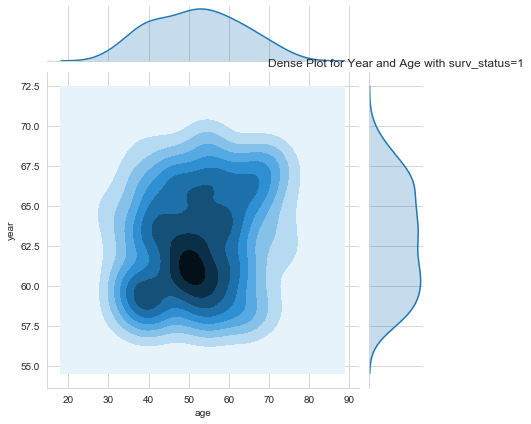

In [17]:
#Dense Plot for HaberMan Data Set w.r.t. Year and Age column
sns.jointplot(x="age", y="year", data=surv_status1, kind="kde");
plt.title("Dense Plot for Year and Age with surv_status=1")
plt.show();

#Observation:
#surv_status1 means value =1
#so if (year>=60 and <=62) and (age>=48 and age<=55) 
#most the the surv_status1=1 is populated over this range
#more the spread happend lesser is the #of density points for surv_status1=1

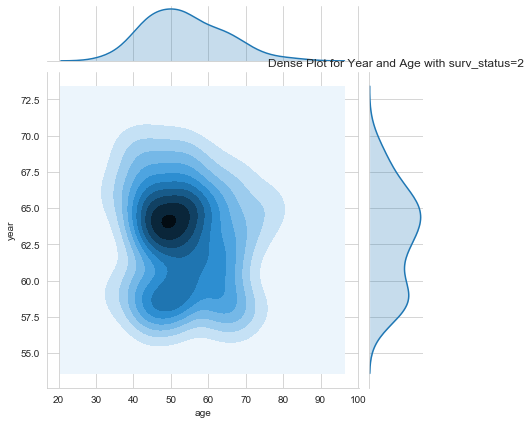

In [18]:
#Dense Plot for HaberMan Data Set w.r.t. Year and Age column
sns.jointplot(x="age", y="year", data=surv_status2, kind="kde");
plt.title("Dense Plot for Year and Age with surv_status=2")
plt.show();

#Observation1:
#surv_status2 means value =2
#so if (year>=61 and <=65) and (age>=46 and age<=56) 
#most the the surv_status2=2 is populated over this range
#more the spread happend lesser is the #of density points for surv_status1=1

#Observation2:
#so if (year>=56 and <=70.5) and (age>=32 and age<=80) 
#there is no records beyond the above range for surv_status2